# Creating decoys

## Cocrystalized ligand

In [242]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import Draw

In [243]:
m = Chem.MolFromMolFile('./gsma.mol')
m2=Chem.AddHs(m)

In [244]:
logp_cocrystal=Descriptors.MolLogP(m2)
round(logp_cocrystal,2)

-0.44

In [245]:
molecular_weight_cocrystal=Descriptors.ExactMolWt(m2)
round(molecular_weight_cocrystal,2)

548.01

In [246]:
h_bond_acceptors_cocrystal=Descriptors.NumHAcceptors(m2)
h_bond_acceptors_cocrystal

10

In [247]:
h_bond_donor_cocrystal=Descriptors.NumHDonors(m2)
h_bond_donor_cocrystal

6

In [248]:
rotatable_bonds_cocrystal=Descriptors.NumRotatableBonds(m)
rotatable_bonds_cocrystal

7

## Filtering

In [249]:
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
import pandas as pd

molecules = Chem.SDMolSupplier('./decoys_final.sdf')

for mol in molecules:
    print(mol)


In [250]:
range(len(molecules))

range(0, 4803)

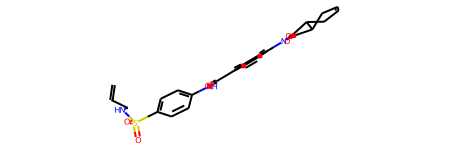

In [251]:
molecules[4802]

In [252]:
space_cocrystal=[]
molecules_outside=[]
for molecule in molecules:

        molecular_weight = Descriptors.ExactMolWt(molecule)
        logp = Descriptors.MolLogP(molecule)
        h_bond_donor = Descriptors.NumHDonors(molecule)
        h_bond_acceptors = Descriptors.NumHAcceptors(molecule)
        rotatable_bonds = Descriptors.NumRotatableBonds(molecule)
        formal_charge = Chem.rdmolops.GetFormalCharge(molecule)
        
        if molecular_weight_cocrystal-100<= molecular_weight<= molecular_weight_cocrystal+100 and logp_cocrystal-1.0 <= logp <= logp_cocrystal+1.0 and h_bond_donor_cocrystal-5 <= h_bond_donor  <= h_bond_donor_cocrystal+5 and h_bond_acceptors_cocrystal -5 <= h_bond_acceptors <= h_bond_acceptors_cocrystal+5 and rotatable_bonds_cocrystal -5<= rotatable_bonds <= rotatable_bonds_cocrystal +5 and -2 <= formal_charge <= 2: 
            space_cocrystal.append(molecule)


In [253]:
space_cocrystal

In [254]:
##Calculating similarity

def sim_rdk_topo_fps(smiA, smisT):

        fp_A = FingerprintMols.FingerprintMol(smiA)
        fps_T = [FingerprintMols.FingerprintMol(y) for y in smisT]
         
        sim_vector = []
        for t in fps_T:
                sim_vector.append(DataStructs.FingerprintSimilarity(fp_A,t))
 
        return sim_vector 

In [255]:
similarity_cocrystal=sim_rdk_topo_fps(m2,space_cocrystal)

In [256]:
Similarity_df=pd.DataFrame(space_cocrystal,similarity_cocrystal).reset_index()
Similarity_df=Similarity_df.rename(columns={'index': 'Similarity',0:'Molecule'})
Similarity_df

,Similarity,Molecule
0,0.583803,<rdkit.Chem.rdchem.Mol object at 0x7f530e2f5210>
1,0.496622,<rdkit.Chem.rdchem.Mol object at 0x7f530e2f50d0>
2,0.440915,<rdkit.Chem.rdchem.Mol object at 0x7f530cd67a80>
3,0.525918,<rdkit.Chem.rdchem.Mol object at 0x7f530cd67a30>
4,0.585155,<rdkit.Chem.rdchem.Mol object at 0x7f530cd675d0>
5,0.422827,<rdkit.Chem.rdchem.Mol object at 0x7f530cd67da0>
6,0.481714,<rdkit.Chem.rdchem.Mol object at 0x7f530d7a1a30>
7,0.517131,<rdkit.Chem.rdchem.Mol object at 0x7f530cf185d0>
8,0.484831,<rdkit.Chem.rdchem.Mol object at 0x7f530d7a14e0>
9,0.484831,<rdkit.Chem.rdchem.Mol object at 0x7f530cf18710>


In [257]:
Similarity_df=Similarity_df.sort_values(by='Similarity')
Similarity_df

,Similarity,Molecule
20,0.377538,<rdkit.Chem.rdchem.Mol object at 0x7f530cf20620>
12,0.420555,<rdkit.Chem.rdchem.Mol object at 0x7f530cd4ca30>
5,0.422827,<rdkit.Chem.rdchem.Mol object at 0x7f530cd67da0>
14,0.439696,<rdkit.Chem.rdchem.Mol object at 0x7f530ed64120>
2,0.440915,<rdkit.Chem.rdchem.Mol object at 0x7f530cd67a80>
17,0.459178,<rdkit.Chem.rdchem.Mol object at 0x7f530daa3210>
10,0.460058,<rdkit.Chem.rdchem.Mol object at 0x7f530e5f7bc0>
13,0.466087,<rdkit.Chem.rdchem.Mol object at 0x7f530eb69da0>
18,0.474395,<rdkit.Chem.rdchem.Mol object at 0x7f530ed64cb0>
6,0.481714,<rdkit.Chem.rdchem.Mol object at 0x7f530d7a1a30>


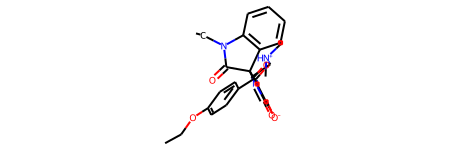

In [258]:
Similarity_df.loc[0, ['Molecule']][0]

In [259]:
print(Chem.MolToMolBlock(Similarity_df.loc[0, ['Molecule']][0]),file=open('./decoy.mol','w+'))